### Question: what is the average duration of a marriage between 2006 and 2015?

In [1]:
from Starts.startmodskl import *
from Starts.startvis import *
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
divorces_groupby_dur_2006_2015 = pd.read_csv('10_EY/divorces_groupby_dur_2006_2015.csv')
marriages_divorces_1950_2015 = pd.read_csv('10_EY/marriages_divorces_1950_2015.csv')

# divorces_groupby_dur_2006_2015.set_index('Ehedauer', inplace=True)
marriages_divorces_1950_2015.set_index('Jahr', inplace=True)

local_kwargs {'data_path_1': '10_EY/marriages_1950_2015.csv', 'data_path_2': '10_EY/marriages_groupby_age2015.csv', 'data_path_3': '10_EY/marriages_groupby_de_1994_2015.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
marriages_divorces_1950_2015.index = pd.to_datetime(marriages_divorces_1950_2015.index, format='%Y')
marriages_divorces_1950_2015['2006':'2015'].describe()

,Eheschließungen,Eheschließungen je 1000 Einwohner,Ehescheidungen
count,10.000000,10.000000,10.000000
mean,380510.500000,4.670000,180894.600000
std,8916.370939,0.133749,10635.669139
min,368922.000000,4.500000,163335.000000
25%,374524.500000,4.600000,172161.500000
50%,378127.500000,4.650000,186422.000000
75%,384975.750000,4.775000,187498.000000
max,400115.000000,4.900000,191948.000000


In [3]:
divorces_groupby_dur_2006_2015.columns

Index(['Ehedauer', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')

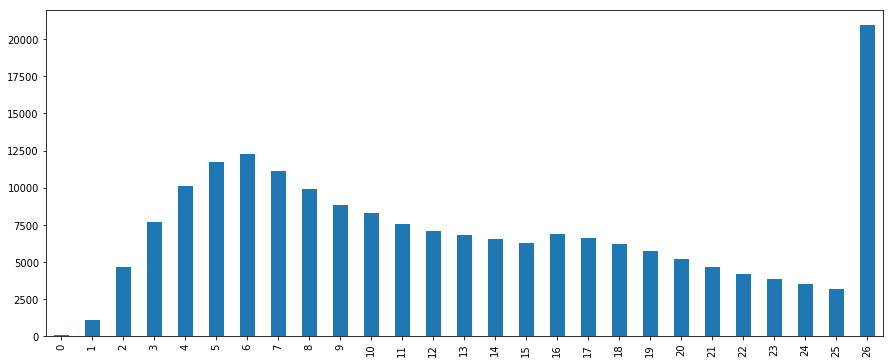

In [4]:
divorces_groupby_dur_2006_2015['2006'].plot(kind='bar')

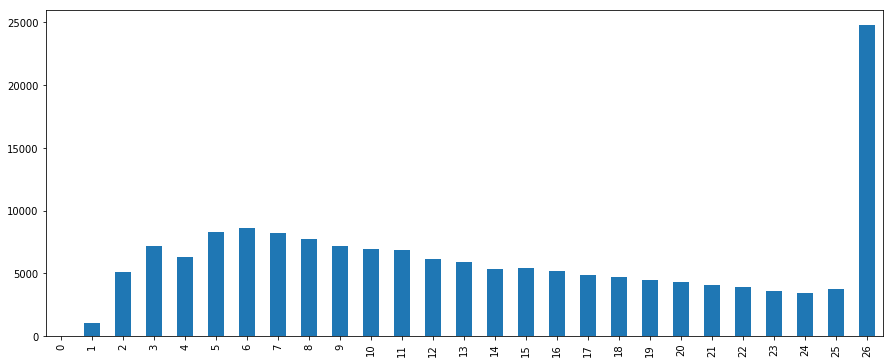

In [5]:
divorces_groupby_dur_2006_2015['2015'].plot(kind='bar')

In [6]:
# Test calculation in 2006
divorces2016 = divorces_groupby_dur_2006_2015['2006'].mode()
sum(divorces2016)
average_2016 = sum([(i*v/sum(divorces2016)) for i, v in enumerate(divorces2016)])
average_2016

16.942323807927597

In [7]:
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
average_duration_2006_2015 = []
for y in years:
    divorces = divorces_groupby_dur_2006_2015[y].mode()
    print (y, sum([(i*v/sum(divorces)) for i, v in enumerate(divorces)]))
    average_duration_2006_2015.append(sum([(i*v/sum(divorces)) for i, v in enumerate(divorces)]))

2006 16.9423238079
2007 16.9476297896
2008 16.9006293371
2009 16.8724013411
2010 16.7656411382
2011 16.6948358559
2012 16.7099756066
2013 16.7118522313
2014 16.7661959458
2015 16.8918908991


In [8]:
print("Average duration of a marriage between 2006 and 2015: ", np.mean(average_duration_2006_2015), " years")

Average duration of a marriage between 2006 and 2015:  16.8203375953  years


### Question: is there a significant decrease in the duration of a marriage in 2006-2015?

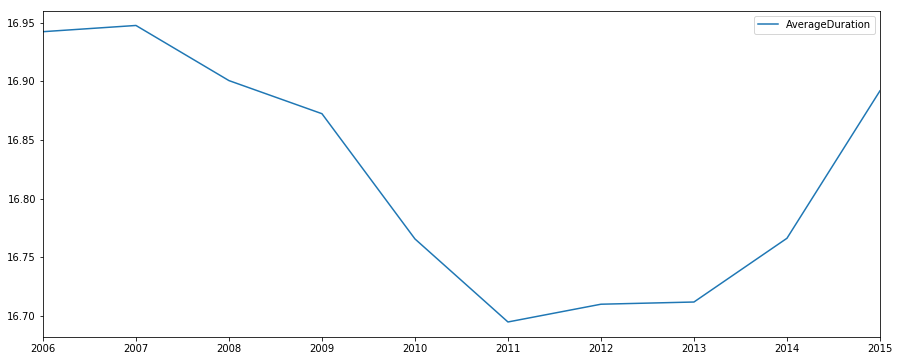

In [10]:
average_duration = pd.DataFrame(average_duration_2006_2015, index=years, columns=['AverageDuration'])
average_duration.plot()

In [11]:
# Variance between years from 2006 to 2015
average_duration.diff()

,AverageDuration
2006,NaN
2007,0.005306
2008,-0.047000
2009,-0.028228
2010,-0.106760
2011,-0.070805
2012,0.015140
2013,0.001877
2014,0.054344
2015,0.125695


### Answer: yes from 2007 to 2011, there is significant descreasing in the duration of a marriage